<a href="https://colab.research.google.com/github/jotagectti/Data-Mining-Machine-Learning-y-Deep-Learning/blob/main/Resoluci%C3%B3n_ejercicio_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.**Preparacion de Datos**

In [1]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
#from -> https://archive.ics.uci.edu/ml/datasets/student+performance
#cargar el data set
path = "student-mat.csv"
dataset_mat = pd.read_csv(path,sep=";")

#visualizar
dataset_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [3]:
dataset_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

##1.**EDA(univariante)**

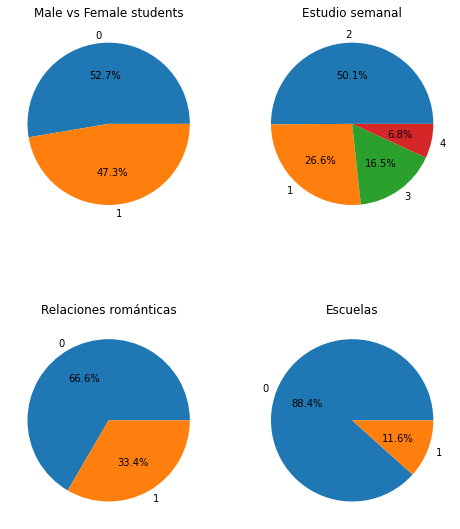

In [16]:
# Pie charts
f, ax = plt.subplots(figsize=(8,10))

# Genero
plt.subplot(2,2,1)
plt.title("Male vs Female students")
sums = dataset_mat["sex"].value_counts()
labels = dataset_mat["sex"].unique()
plt.pie(sums, labels=labels,autopct='%1.1f%%')

# Weekly study time
plt.subplot(2, 2, 2)
plt.title("Estudio semanal")
df_sums = dataset_mat["studytime"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Romantic relationship
plt.subplot(2, 2, 3)
plt.title("Relaciones románticas")
df_sums = dataset_mat["romantic"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Escuela
plt.subplot(2, 2, 4)
plt.title("Escuelas")
df_sums = dataset_mat["school"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
plt.show()

plt.show()

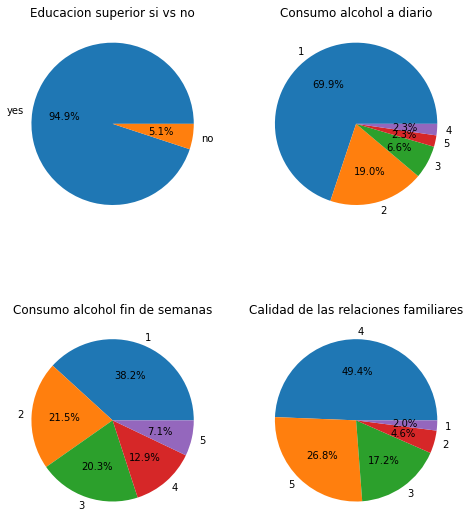

In [10]:
# Pie charts
f, ax = plt.subplots(figsize=(8, 10))
# Educacion superior
plt.subplot(2, 2, 1)
plt.title("Educacion superior si vs no")
df_sums = dataset_mat["higher"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Consumo alcohol a diario
plt.subplot(2, 2, 2)
plt.title("Consumo alcohol a diario")
df_sums = dataset_mat["Dalc"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Consumo alcohol fin de semanas
plt.subplot(2, 2, 3)
plt.title("Consumo alcohol fin de semanas")
df_sums = dataset_mat["Walc"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Calidad relaciones familiares
plt.subplot(2, 2, 4)
plt.title("Calidad de las relaciones familiares")
df_sums = dataset_mat["famrel"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
plt.show()

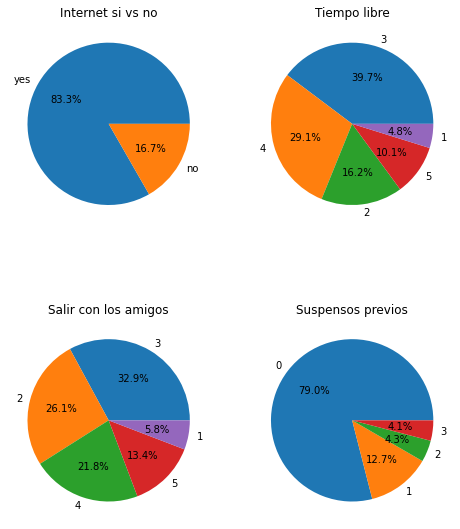

In [11]:
# Pie charts
f, ax = plt.subplots(figsize=(8, 10))
# Educacion superior
plt.subplot(2, 2, 1)
plt.title("Internet si vs no")
df_sums = dataset_mat["internet"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Consumo alcohol a diario
plt.subplot(2, 2, 2)
plt.title("Tiempo libre")
df_sums = dataset_mat["freetime"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Consumo alcohol fin de semanas
plt.subplot(2, 2, 3)
plt.title("Salir con los amigos")
df_sums = dataset_mat["goout"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Calidad relaciones familiares
plt.subplot(2, 2, 4)
plt.title("Suspensos previos")
df_sums = dataset_mat["failures"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
plt.show()

In [4]:
list_binary = ['sex','school','address', 'Pstatus','famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']
list_multi_not_ord = ['Mjob','Fjob','reason','guardian']
list_cat_not_ord = list_binary + list_multi_not_ord

In [6]:
#pasar a codificacion numerica

dataset_mat.info()
#variables no tienen son las string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
#ncoding numerico de las variables
obj_df = dataset_mat.select_dtypes(include=['object']).copy()
#print(obj_df)
#

from sklearn.preprocessing import LabelEncoder
lb_encoder =  LabelEncoder()

for col in obj_df.columns:
  dataset_mat[col]=lb_encoder.fit_transform(dataset_mat[col])

dataset_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [13]:
dataset_mat.isnull().sum()
#check valor nulo

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

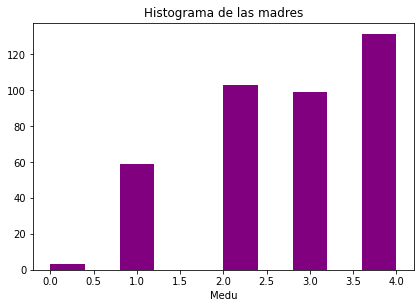

In [20]:
# Histogramas
# tamano de representaciones
#f, ax = plt.figure(figsize(15,10))
plt.figure(figsize=(15,10))
# Histograma educacion de madres
plt.subplot(2,2,1)
plt.hist(dataset_mat['Medu'], color='purple')
plt.title("Histograma de las madres")
plt.xlabel("Medu")

plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


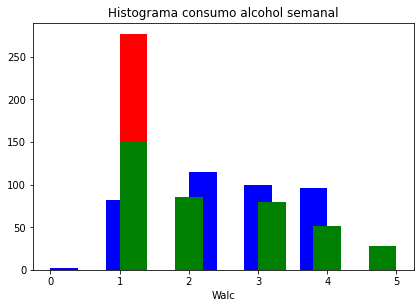

In [27]:
#Otros histogramas
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 2)
plt.hist(dataset_mat['Fedu'], color = 'blue')
plt.title('Histograma sobre la educacion de los padres')
plt.xlabel('Fedu')
# Histograma Walc/Dalc
plt.subplot(2, 2, 2)
plt.hist(dataset_mat['Dalc'], color = 'red')
plt.title('Histograma consumo alcohol diario')
plt.xlabel('Dalc')
plt.subplot(2, 2, 2)
plt.hist(dataset_mat['Walc'], color = 'green')
plt.title('Histograma consumo alcohol semanal')
plt.xlabel('Walc')
plt.show()

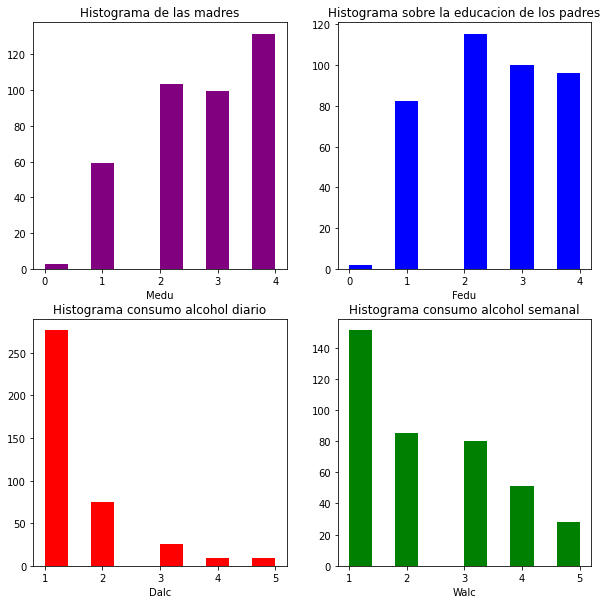

In [31]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(dataset_mat['Medu'], color='purple')
plt.title("Histograma de las madres")
plt.xlabel("Medu")
plt.subplot(2,2,2)
plt.hist(dataset_mat['Fedu'], color = 'blue')
plt.title('Histograma sobre la educacion de los padres')
plt.xlabel('Fedu')
plt.subplot(2,2,3)
plt.hist(dataset_mat['Dalc'], color = 'red')
plt.title('Histograma consumo alcohol diario')
plt.xlabel('Dalc')
plt.subplot(2,2,4)
plt.hist(dataset_mat['Walc'], color = 'green')
plt.title('Histograma consumo alcohol semanal')
plt.xlabel('Walc')
plt.show()

Text(0.5, 0, 'G3')

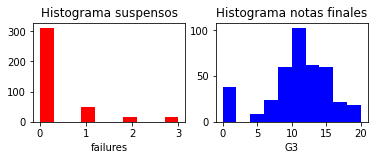

In [32]:
# Histograma G3/failures
plt.subplot(2, 2, 1)
plt.hist(dataset_mat['failures'], color = 'red')
plt.title('Histograma suspensos')
plt.xlabel('failures')
plt.subplot(2, 2, 2)
plt.hist(dataset_mat['G3'], color = 'blue')
plt.title('Histograma notas finales')
plt.xlabel('G3')

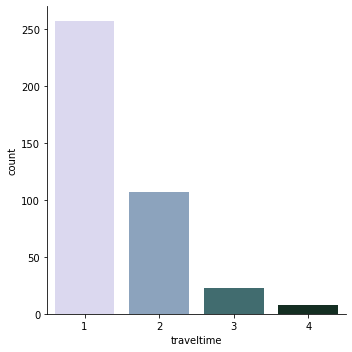

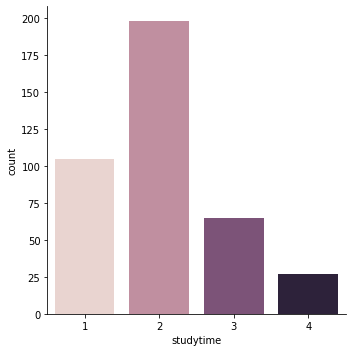

In [38]:
# Histogramas con seaborn
sns.catplot(x="traveltime",kind="count",palette="ch:29", data=dataset_mat)
;
sns.catplot(x="studytime", kind="count", palette="ch:33", data=dataset_mat);


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

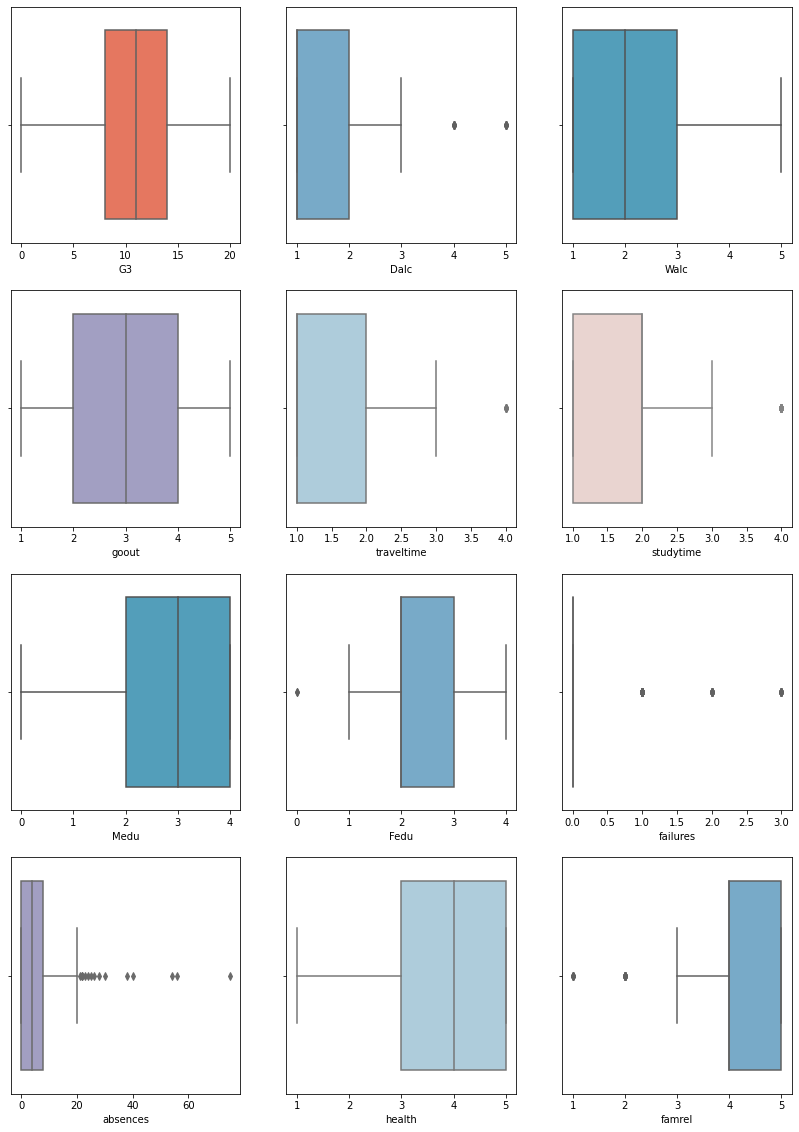

In [51]:
#boxplots
f, ax = plt.subplots(4,3,figsize=(14,20))
sns.boxplot(x= "G3", data=dataset_mat, orient='v' , ax=ax[0][0], palette="Reds")
sns.boxplot(x= "Dalc", data=dataset_mat, orient='v' , ax=ax[0][1], palette="Blues")
sns.boxplot(x= "Walc", data=dataset_mat, orient='v' , ax=ax[0][2], palette="GnBu_d")
sns.boxplot(x= "goout", data=dataset_mat, orient='v' , ax=ax[1][0], palette="Purples")
sns.boxplot(x= "traveltime", data=dataset_mat, orient='v' , ax=ax[1][1], palette="Paired")
sns.boxplot(x= "studytime", data=dataset_mat, orient='v' , ax=ax[1][2], palette=sns.cubehelix_palette(8))
sns.boxplot(x= "Medu", data=dataset_mat, orient='v' , ax=ax[2][0], palette="GnBu_d")
sns.boxplot(x= "Fedu", data=dataset_mat, orient='v' , ax=ax[2][1], palette="Blues")
sns.boxplot(x= "failures", data=dataset_mat, orient='v' , ax=ax[2][2], palette="Reds")
sns.boxplot(x= "absences", data=dataset_mat, orient='v' , ax=ax[3][0], palette="Purples")
sns.boxplot(x= "health", data=dataset_mat, orient='v' , ax=ax[3][1], palette="Paired")
sns.boxplot(x= "famrel", data=dataset_mat, orient='v' , ax=ax[3][2], palette="Blues")